# From text to data in Python

First, we'll further explore the vocabulary terms from the previous section by implementing them in Python. Then, we'll conduct our cutting-edge and all-important analysis on Shakespeare vs. Seinfeld.

In [1]:
import matplotlib.pyplot as plt                               # ah, friendship. #grateful
import seaborn as sns
import pandas as pd

import nltk                                                   # some new friends here!
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('punkt')
from nltk.tokenize import word_tokenize                       
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer   # new resources from an old friend!
from sklearn.metrics.pairwise import cosine_similarity

## 1. Tokenization & frequency distributions

In [2]:
# simple tokenization

text = "Those aren't for New Year's. Those are my everyday balloons." 
print(word_tokenize(text))

['Those', 'are', "n't", 'for', 'New', 'Year', "'s", '.', 'Those', 'are', 'my', 'everyday', 'balloons', '.']


In [3]:
# tokenization, then inspect how many types, tokens

text2 = "I don't really want to go to congress again. I'm kind of too young to be in congress so much, you know?"
tokens = word_tokenize(text2)
fdist = FreqDist(tokens)
print(fdist)

<FreqDist with 23 samples and 27 outcomes>


In [4]:
fdist.most_common(2)

[('to', 3), ('I', 2)]

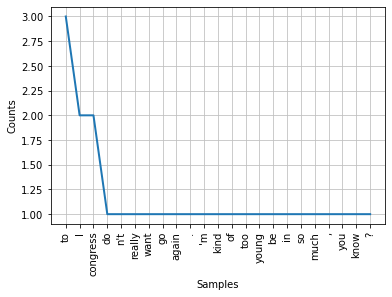

In [5]:
fdist.plot()     # plot tokens by frequency
plt.show()

## 2. Pre-processing example

In [6]:
# Have a look at one set of stop words

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
parrot_text = """This parrot is no more! It has ceased to be! 
                It’s expired and gone to meet its maker! 
                This is a late parrot! It’s a stiff! Bereft of life, it rests in peace! 
                If you hadn’t nailed it to the perch, it would be pushing up the daisies! 
                It’s run down the curtain and joined the choir invisible! 
                This is an ex-parrot!"""

In [8]:
stop_words = set(stopwords.words('english'))
 
parrot_tokens = word_tokenize(parrot_text)

parrot_tokens= [w for w in parrot_tokens if w.isalnum()]     # uncomment this to remove punctuation

parrot_tokens_nostopwords = [w for w in parrot_tokens if not w.lower() in stop_words]
 
parrot_tokens_nostopwords = []
 
for w in parrot_tokens:
    if w not in stop_words:
        parrot_tokens_nostopwords.append(w)

print("Tokenized parrot text:", parrot_tokens), print()

print("Tokenized parrot text with stopwords removed:", parrot_tokens_nostopwords)

Tokenized parrot text: ['This', 'parrot', 'is', 'no', 'more', 'It', 'has', 'ceased', 'to', 'be', 'It', 's', 'expired', 'and', 'gone', 'to', 'meet', 'its', 'maker', 'This', 'is', 'a', 'late', 'parrot', 'It', 's', 'a', 'stiff', 'Bereft', 'of', 'life', 'it', 'rests', 'in', 'peace', 'If', 'you', 'hadn', 't', 'nailed', 'it', 'to', 'the', 'perch', 'it', 'would', 'be', 'pushing', 'up', 'the', 'daisies', 'It', 's', 'run', 'down', 'the', 'curtain', 'and', 'joined', 'the', 'choir', 'invisible', 'This', 'is', 'an']

Tokenized parrot text with stopwords removed: ['This', 'parrot', 'It', 'ceased', 'It', 'expired', 'gone', 'meet', 'maker', 'This', 'late', 'parrot', 'It', 'stiff', 'Bereft', 'life', 'rests', 'peace', 'If', 'nailed', 'perch', 'would', 'pushing', 'daisies', 'It', 'run', 'curtain', 'joined', 'choir', 'invisible', 'This']


In [9]:
fdist = FreqDist(parrot_tokens)
print(fdist)

<FreqDist with 45 samples and 65 outcomes>


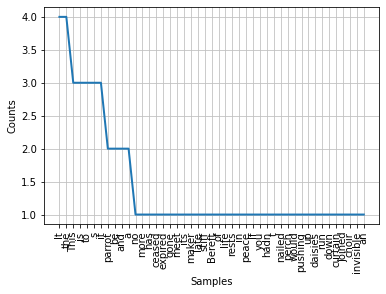

In [10]:
fdist.plot()
plt.show()

## 3. Stemming vs. lemmatization

In [12]:
ps = PorterStemmer()
text = "waits waited hurries hurrying tries try"
tokenization = word_tokenize(text)
for w in tokenization:
    print("Stemming for {} is {}".format(w,ps.stem(w))) 

Stemming for waits is wait
Stemming for waited is wait
Stemming for hurries is hurri
Stemming for hurrying is hurri
Stemming for tries is tri
Stemming for try is tri


In [13]:
wnl = WordNetLemmatizer()
text = "waits waited hurries hurrying tries try"
tokenization = word_tokenize(text)
for w in tokenization:
    print("Lemma for {} is {}".format(w, wnl.lemmatize(w)))  

Lemma for waits is wait
Lemma for waited is waited
Lemma for hurries is hurry
Lemma for hurrying is hurrying
Lemma for tries is try
Lemma for try is try


## 4. Document-Term Matrix (DTM)

In [14]:
docs = ["I looked into the eyes of the giant fish. Mammal. Whatever.", 
        "It's not the size of the opponents, Elaine, it's the ferocity", 
        'You kept making all the stops?! They kept ringing the bell!']
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
print(df)

   all  bell  elaine  eyes  ferocity  fish  giant  into  it  kept  ...  not  \
0    0     0       0     1         0     1      1     1   0     0  ...    0   
1    0     0       1     0         1     0      0     0   2     0  ...    1   
2    1     1       0     0         0     0      0     0   0     2  ...    0   

   of  opponents  ringing  size  stops  the  they  whatever  you  
0   1          0        0     0      0    2     0         1    0  
1   1          1        0     1      0    3     0         0    0  
2   0          0        1     0      1    2     1         0    1  

[3 rows x 23 columns]


In [15]:
pd.set_option('display.max_columns', None)
df

all  bell  elaine  eyes  ferocity  fish  giant  into  it  kept  looked  \
0    0     0       0     1         0     1      1     1   0     0       1   
1    0     0       1     0         1     0      0     0   2     0       0   
2    1     1       0     0         0     0      0     0   0     2       0   

   making  mammal  not  of  opponents  ringing  size  stops  the  they  \
0       0       1    0   1          0        0     0      0    2     0   
1       0       0    1   1          1        0     1      0    3     0   
2       1       0    0   0          0        1     0      1    2     1   

   whatever  you  
0         1    0  
1         0    0  
2         0    1

## 5. Cosine similarity

In [16]:
print(cosine_similarity(df, df))

[[1.         0.46358632 0.2981424 ]
 [0.46358632 1.         0.35540933]
 [0.2981424  0.35540933 1.        ]]


## 6. A real(ish) example!

In [17]:
doc1 = """To be, or not to be, that is the question:
        Whether 'tis nobler in the mind to suffer
        The slings and arrows of outrageous fortune,
        Or to take arms against a sea of troubles
        And by opposing end them. To die—to sleep,
        No more; and by a sleep to say we end
        The heart-ache and the thousand natural shocks
        That flesh is heir to: 'tis a consummation
        Devoutly to be wish'd. To die, to sleep;
        To sleep, perchance to dream—ay, there's the rub:
        For in that sleep of death what dreams may come,
        When we have shuffled off this mortal coil,
        Must give us pause—there's the respect
        That makes calamity of so long life."""
    
doc2 =  """To-morrow, and to-morrow, and to-morrow,
        Creeps in this petty pace from day to day
        To the last syllable of recorded time,
        And all our yesterdays have lighted fools
        The way to dusty death. Out, out, brief candle!
        Life’s but a walking shadow, a poor player
        That struts and frets his hour upon the stage
        And then is heard no more: it is a tale
        Told by an idiot, full of sound and fury,
        Signifying nothing."""

doc3 = """Betting on the horses: you can’t possibly win. 
        I don’t understand what we’re betting on.
        Do the horses know that it’s a race? Are they aware? 
        What is going on here? After the race are the horses 
        walking back to the stable: “I was third, I was first, 
        I was ninth.” I think they’re thinking: “Oat bag, 
        I get my oat bag now!” “Oat bag time for me.” I gotta 
        bet on this idiot? I mean, I’m sure the horses have 
        some idea that the jockey is in a hurry. He’s on him, 
        he’s hitting him with this thing. He’s going: 
        “Come on, come on”. Obviously the jockey’s in a hurry. 
        But the horse must get to the end and go: 
        “We were just here! 
        What was the point of that?"""

corpus = [doc1, doc2, doc3]

In [18]:
X = vec.fit_transform(corpus)
real_df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
real_df

ache  after  against  all  an  and  are  arms  arrows  aware  ay  back  \
0     1      0        1    0   0    4    0     1       1      0   1     0   
1     0      0        0    1   1    6    0     0       0      0   0     0   
2     0      1        0    0   0    1    2     0       0      1   0     1   

   bag  be  bet  betting  brief  but  by  calamity  can  candle  coil  come  \
0    0   3    0        0      0    0   2         1    0       0     1     1   
1    0   0    0        0      1    1   1         0    0       1     0     0   
2    3   0    1        2      0    1   0         0    1       0     0     2   

   consummation  creeps  day  death  devoutly  die  do  don  dream  dreams  \
0             1       0    0      1         1    2   0    0      1       1   
1             0       1    2      1         0    0   0    0      0       0   
2             0       0    0      0         0    0   1    1      0       0   

   dusty  end  first  flesh  fools  for  fortune  frets  from  full  fury  \
0      0    2      0      1      0    1        1      0     0     0     0   
1      1    0      0      0      1    0        0      1     1     1     1   
2      0    1      1      0      0    1        0      0     0     0     0   

   get  give  go  going  gotta  have  he  heard  heart  heir  here  him  his  \
0    0     1   0      0      0     1   0      0      1     1     0    0    0   
1    0     0   0      0      0     1   0      1      0     0     0    0    1   
2    2     0   1      2      1     1   3      0      0     0     2    2    0   

   hitting  horse  horses  hour  hurry  idea  idiot  in  is  it  jockey  just  \
0        0      0       0     0      0     0      0   2   2   0       0     0   
1        0      0       0     1      0     0      1   1   2   1       0     0   
2        1      1       4     0      2     1      1   2   2   1       2     1   

   know  last  life  lighted  long  makes  may  me  mean  mind  more  morrow  \
0     0     0     1        0     1      1    1   0     0     1     1       0   
1     0     1     1        1     0      0    0   0     0     0     1       3   
2     1     0     0        0     0      0    0   1     1     0     0       0   

   mortal  must  my  natural  ninth  no  nobler  not  nothing  now  oat  \
0       1     1   0        1      0   1       1    1        0    0    0   
1       0     0   0        0      0   1       0    0        1    0    0   
2       0     1   1        0      1   0       0    0        0    1    3   

   obviously  of  off  on  opposing  or  our  out  outrageous  pace  pause  \
0          0   4    1   0         1   2    0    0           1     0      1   
1          0   2    0   0         0   0    1    2           0     1      0   
2          1   1    0   7         0   0    0    0           0     0      0   

   perchance  petty  player  point  poor  possibly  question  race  re  \
0          1      0       0      0     0         0         1     0   0   
1          0      1       1      0     1         0         0     0   0   
2          0      0       0      1     0         1         0     2   2   

   recorded  respect  rub  say  sea  shadow  shocks  shuffled  signifying  \
0         0        1    1    1    1       0       1         1           0   
1         1        0    0    0    0       1       0         0           1   
2         0        0    0    0    0       0       0         0           0   

   sleep  slings  so  some  sound  stable  stage  struts  suffer  sure  \
0      5       1   1     0      0       0      0       0       1     0   
1      0       0   0     0      1       0      1       1       0     0   
2      0       0   0     1      0       1      0       0       0     1   

   syllable  take  tale  that  the  them  then  there  they  thing  think  \
0         0     1     0     4    7     1     0      2     0      0      0   
1         1     0     1     1    3     0     1      0     0      0      0   
2         0     0     0     3   11     0

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(real_df, real_df))

[[1.         0.60370413 0.39027206]
 [0.60370413 1.         0.29592291]
 [0.39027206 0.29592291 1.        ]]


In [20]:
# for fun, let's plot the freqdist for doc1

tokens3 = word_tokenize(doc1)
fdist = FreqDist(tokens3)
print(fdist)

<FreqDist with 84 samples and 136 outcomes>


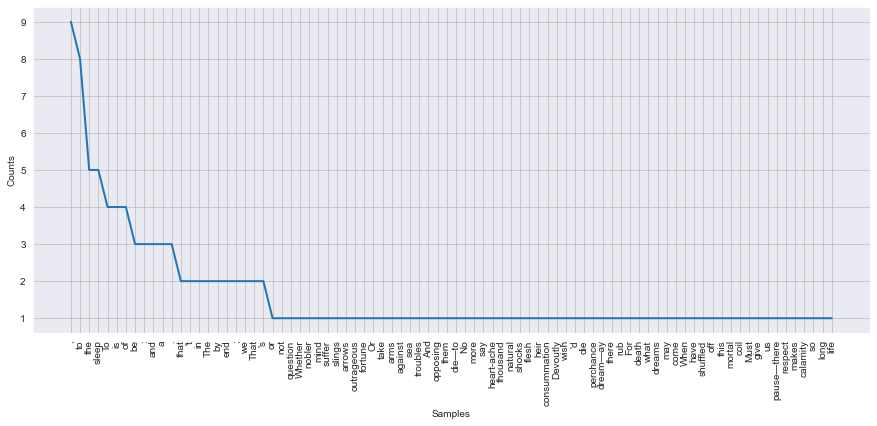

In [21]:
# and make it look slightly nicer!

sns.set_style('darkgrid')

plt.figure(figsize=(15, 6))
fdist.plot()
plt.show()                              # Zipf's law!!